In [73]:
import warnings
warnings.simplefilter("ignore")


In [92]:
import pandas as pd 
listing = pd.read_csv("./data/house_data.csv", sep=",")
listing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [75]:
print(listing.shape)

(21613, 21)


In [76]:
columns_to_drop = ['id', 'date', 'waterfront', 'view']

listing = listing.drop(columns=columns_to_drop)

print(listing.shape)
print(listing.columns)

(21613, 17)
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


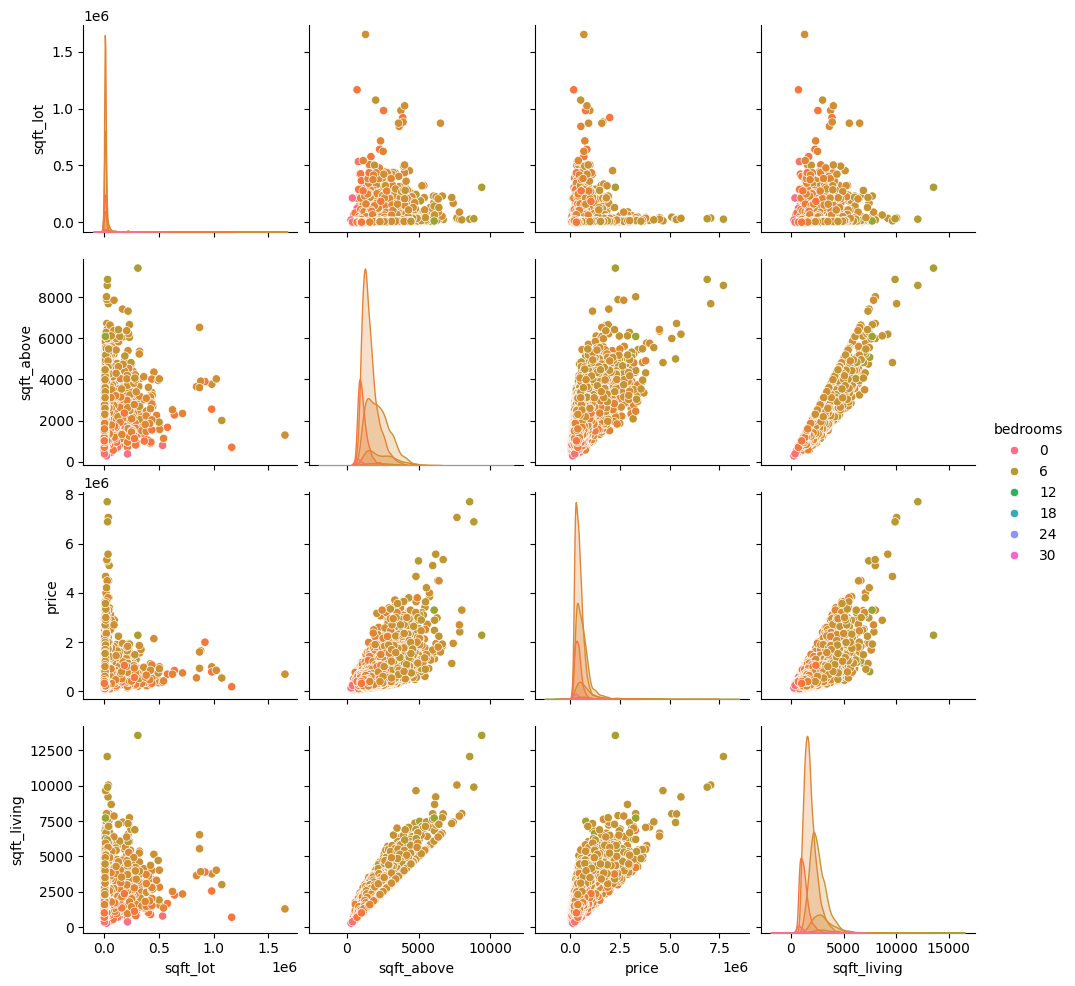

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['sqft_lot', 'sqft_above', 'price', 'sqft_living', 'bedrooms']
listing_filtered = listing[columns_to_plot]
pairplot = sns.pairplot(listing_filtered, hue='bedrooms', palette='husl')

print(pairplot)
plt.show()

In [78]:
# extract the values ​​of the price (your target vector) into a new variable and display its size
price = listing['price']
print(price.shape)

(21613,)


In [79]:
listing.drop(columns=['price'], inplace=True)
print(listing.shape)

(21613, 16)


In [80]:
columns_for_prediction = ['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
listing_for_prediction = listing[columns_for_prediction]
print(listing_for_prediction.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0         3       1.00         1180      5650     1.0          3      7   
1         3       2.25         2570      7242     2.0          3      7   
2         2       1.00          770     10000     1.0          3      6   
3         4       3.00         1960      5000     1.0          5      7   
4         3       2.00         1680      8080     1.0          3      8   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        1180              0      1955             0    98178  47.5112   
1        2170            400      1951          1991    98125  47.7210   
2         770              0      1933             0    98028  47.7379   
3        1050            910      1965             0    98136  47.5208   
4        1680              0      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  
0 -122.257           1340        5650  
1 -122.319           169

In [81]:
print(listing.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


In [82]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.2)
lasso_model.fit(listing_for_prediction, price)
print(lasso_model.coef_)

[-4.60759488e+04  4.30360839e+04  2.84242942e+02  1.58200409e-01
  1.10269916e+04  2.92314998e+04  1.01098077e+05 -9.69653208e+01
 -1.04900337e+02 -2.83156609e+03  3.49026743e+01 -4.78262713e+02
  5.55905746e+05 -2.51997308e+05  4.02912555e+01 -3.26986765e-01]


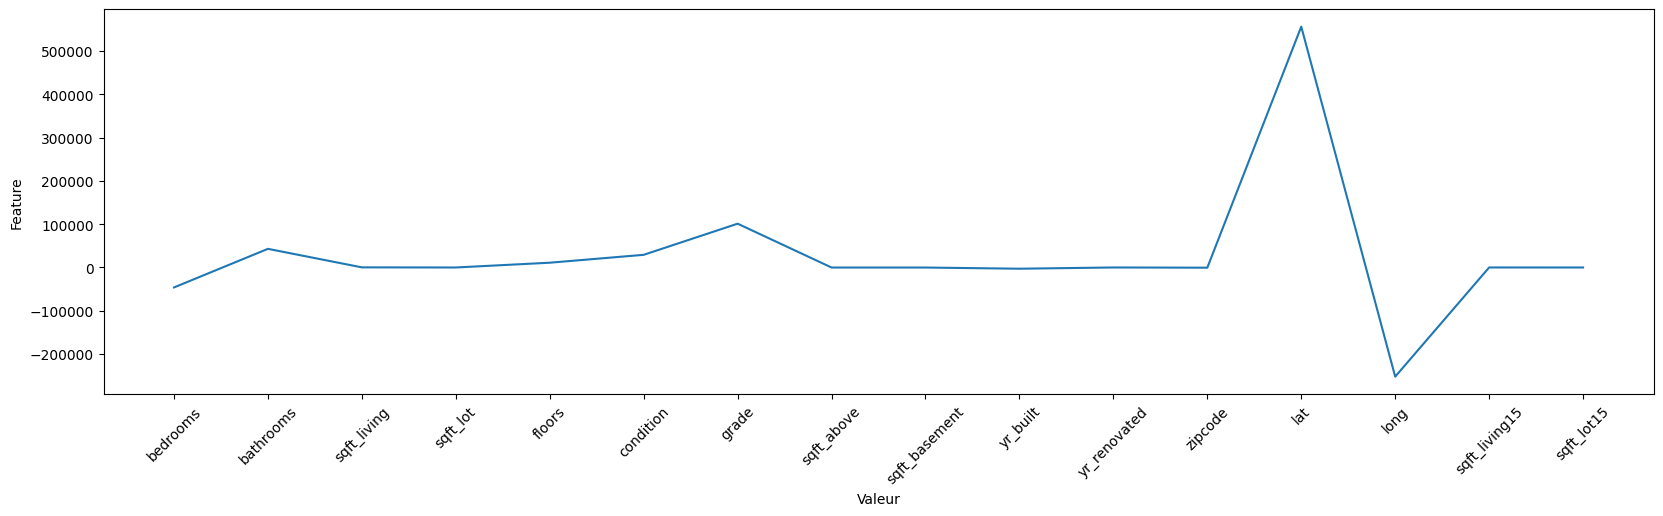

In [83]:
plt.figure(figsize=(20, 5))
plt.plot(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Valeur')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.show()


In [84]:
lasso_model_new = Lasso(alpha=3213)
lasso_model_new.fit(listing_for_prediction, price)
print(lasso_model_new.coef_)

[-3.97643696e+04  3.23104238e+04  2.81535090e+02  6.62789708e-02
  6.02352215e+03  1.74104744e+04  1.09395964e+05 -9.58134415e+01
 -8.90434985e+01 -3.19015392e+03  3.20608501e+01 -7.45565011e+01
  3.56356799e+05 -0.00000000e+00  3.38128814e+01 -4.90171352e-01]


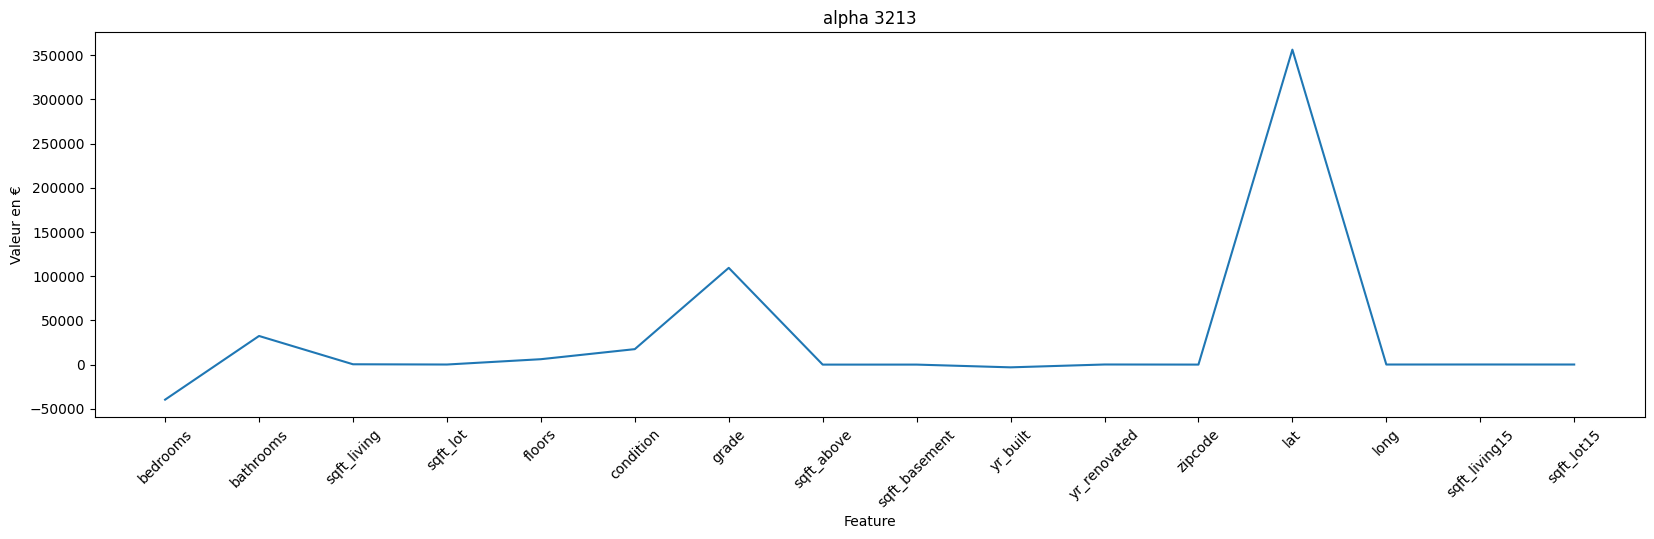

In [85]:
coef_df_new = pd.DataFrame({
    'Feature': columns_for_prediction,
    'Coefficient': lasso_model_new.coef_
})


plt.figure(figsize=(20, 5))
plt.plot(coef_df_new['Feature'], coef_df_new['Coefficient'])
plt.xlabel('Feature')
plt.ylabel('Valeur en €')
plt.title('alpha 3213')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Erreur dans l'output. Output attendu : [16] https://courses.dallard.tech/ml/notebooks/Lasso%26Ridge/#the-lasso-method
lasso_model_new2 = Lasso(alpha=1000)
lasso_model_new2.fit(listing_for_prediction, price)
print(lasso_model_new2.coef_)

[-4.41042683e+04  3.97767416e+04  2.83545742e+02  1.26217388e-01
  9.80142646e+03  2.55447293e+04  1.04048376e+05 -9.71905697e+01
 -9.97114186e+01 -2.96193238e+03  3.38886490e+01 -3.37768304e+02
  4.92962011e+05 -1.59735108e+05  3.77508225e+01 -3.84025860e-01]


In [87]:
    # 